In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from typing import Tuple, Dict, Any
import seaborn
import pandas
import copy

from datasets import load_dataset
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.model_selection import ParameterSampler
import pandas
import numpy as np
import seaborn

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    if transformation == "standard":
        transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
        transformations = dict()

        for feature in transformed_dataset.columns:
            transformations[feature] = StandardScaler()
            transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
            transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
            transformed_dataset.loc[:, feature] = transformed_feature
    else:
        raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations

def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")


In [2]:
import pandas as pd
#Dataset import on pandas Data frames
DatasetCyclists = pd.read_csv("dataset/cyclists_filled.csv")
DatasetRace = pd.read_csv("dataset/races_filled.csv")

MergedDataset = pd.merge(DatasetCyclists, DatasetRace.drop(columns=['name']), left_on='_url', right_on='cyclist', suffixes=('_cyclist', '_race')).drop(columns=['_url_cyclist']) 

MergedDataset.head(10)

,name,birth_year,weight,height,nationality,_url_race,points,uci_points,length,climb_total,...,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta,race_year
0,Bruno Surra,1964.0,61.255717,174.432356,Italy,vuelta-a-espana/1989/stage-1,0.0,0.0,20100.0,588.0,...,1989-04-24 00:25:33,111,bruno-surra,25.0,True,False,False,NaN,15.0,1989
1,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1997/stage-2,0.0,0.0,262000.0,2808.0,...,1997-07-07 06:27:47,133,gerard-rue,32.0,True,False,False,denmark-1991,0.0,1997
2,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1990/stage-1,0.0,0.0,138500.0,1232.0,...,1990-07-01 03:29:36,67,gerard-rue,25.0,True,False,False,france-1978,635.0,1990
3,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1992/stage-7,0.0,0.0,196500.0,2010.0,...,1992-07-11 04:22:52,36,gerard-rue,27.0,True,False,False,france-1978,65.0,1992
4,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1990/stage-9,0.0,0.0,196000.0,2381.0,...,1990-07-09 04:46:44,42,gerard-rue,25.0,True,False,False,france-1978,37.0,1990
5,Gérard Rué,1965.0,74.000000,182.000000,France,la-fleche-wallone/1996/result,5.0,6.0,200500.0,3237.0,...,1996-04-17 04:42:20,36,gerard-rue,31.0,False,False,False,czechoslovakia-1987,140.0,1996
6,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1991/stage-12,8.0,1.0,192000.0,4000.0,...,1991-07-18 05:22:47,11,gerard-rue,26.0,True,False,False,norway-1987,415.0,1991
7,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1989/stage-17,0.0,0.0,165000.0,5000.0,...,1989-07-19 05:18:23,25,gerard-rue,24.0,True,False,False,carrera-inoxpran-1985,464.0,1989
8,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1997/stage-5,0.0,0.0,261300.0,2212.0,...,1997-07-10 06:20:08,109,gerard-rue,32.0,True,False,False,denmark-1991,204.0,1997
9,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1992/stage-15,0.0,0.0,198000.0,2662.0,...,1992-07-20 04:45:19,30,gerard-rue,27.0,True,False,False,france-1978,80.0,1992


In [26]:
clustering_features = MergedDataset[[
    'birth_year', 'weight', 'height'
    ,'length', 'climb_total', 
    'is_tarmac', 'is_cobbled', 'is_gravel', 'points', 
    'uci_points', 'position', 'delta'
]]
clustering_features = clustering_features.iloc[0:10000]


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(clustering_features)
data = scaler.transform(clustering_features)

DBSCAN

In [28]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)

DBSCAN()

In [29]:
dbscan.labels_[:5]


array([-1, -1, -1,  0,  0], dtype=int64)

In [30]:
np.unique(dbscan.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131], dtype=int64),
 array([4438,   66,   13,    6,    5,   32,   44,    5,    8,   12,    8,
           7,  443,   70,    4,    7,   14,   12,  130,   12,   21,  285,
          56,    5,    6,    8,  106,   29,    6,    5,    5,    8,   27,
          

In [31]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, 47], dtype=int64)

<AxesSubplot:xlabel='height', ylabel='weight'>

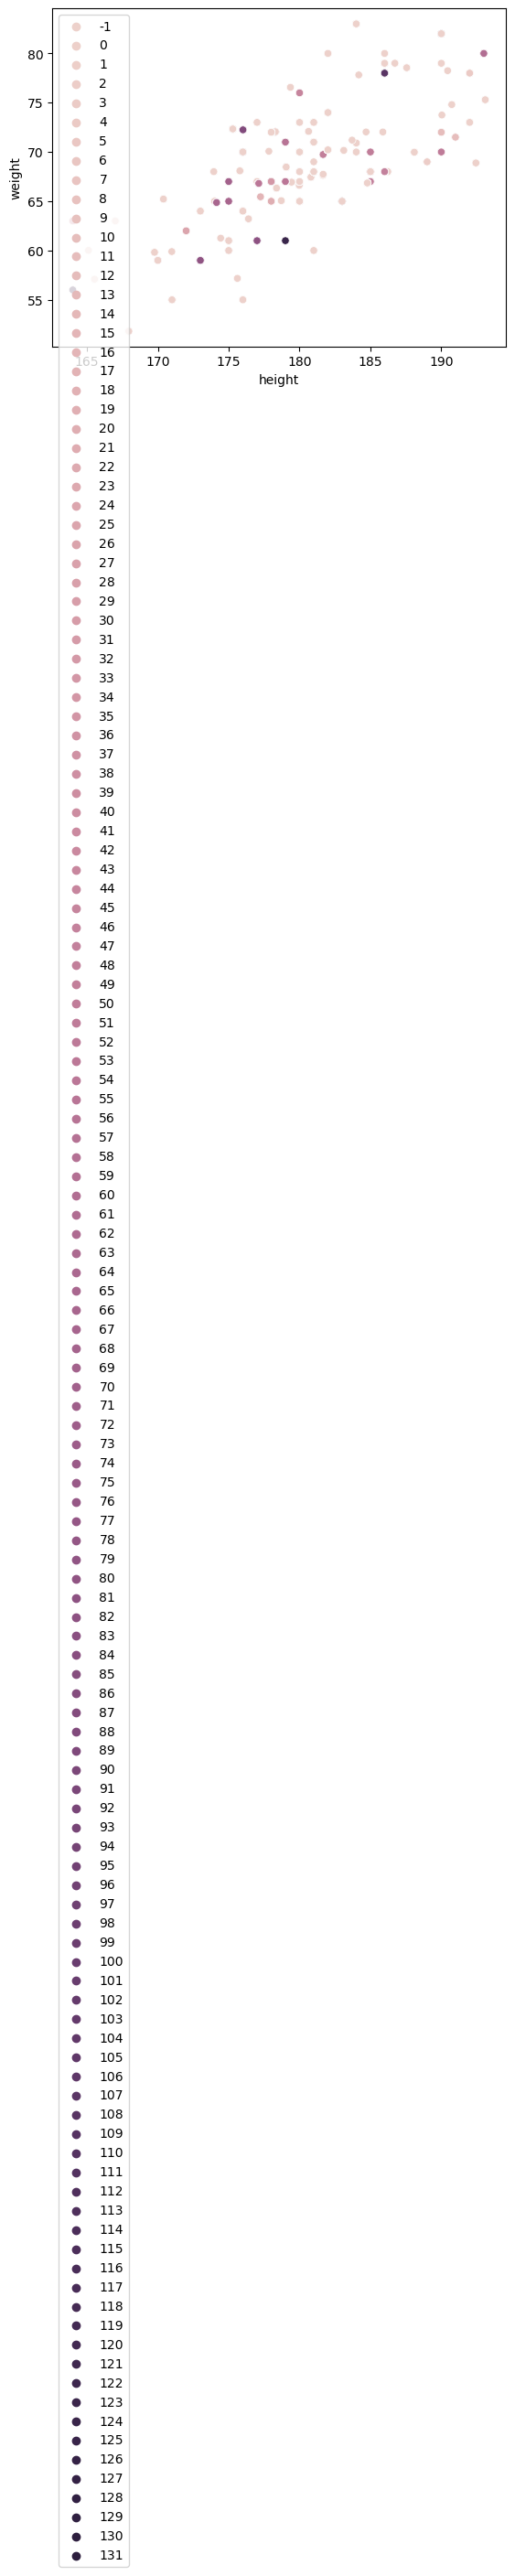

In [32]:
seaborn.scatterplot(data=clustering_features, x="height", y="weight", hue=dbscan.labels_, legend='full')

In [34]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette -0.6160572994886199


Clustering gerarchico